#### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

#### MNIST 데이터 읽어오기

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### 변수 선언 및 초기화
- xavier를 이용하여 변수 초기화

In [3]:
learning_rate = 0.001
num_epochs = 15
batch_size = 100
L2_lambda = 0.01

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable("W1", shape=[784, 392], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([392]))
L1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.get_variable("W2", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([392]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([392]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[392, 392], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([392]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[392, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

y_ = tf.matmul(L4, W5) + b5

#### 정확도 평가 변수 선언

In [4]:
correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### cost 함수와 optimizer 정의
- Gradient Descent Optimizer를 사용하였다.

In [5]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_))
cost += L2_lambda * (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + \
                    tf.nn.l2_loss(W3) + tf.nn.l2_loss(W4) + tf.nn.l2_loss(W5))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#### Session 시작 및 변수 초기화

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#### 학습 시작

Epoch:  1 cost = 10.67419
Epoch:  2 cost = 10.20787
Epoch:  3 cost = 9.74017
Epoch:  4 cost = 9.34856
Epoch:  5 cost = 9.06693
Epoch:  6 cost = 8.86225
Epoch:  7 cost = 8.70098
Epoch:  8 cost = 8.56468
Epoch:  9 cost = 8.44403
Epoch: 10 cost = 8.33306
Epoch: 11 cost = 8.22942
Epoch: 12 cost = 8.13107
Epoch: 13 cost = 8.03719
Epoch: 14 cost = 7.94650
Epoch: 15 cost = 7.85845
Accuracy: 0.8902


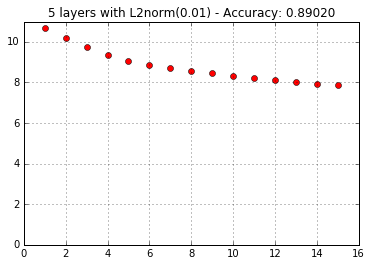

In [7]:
for epoch in range(num_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch: {:2d} cost = {:.5f}'.format(epoch+1, avg_cost))
    plt.plot(epoch+1, avg_cost, 'ro')
    
acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print('Accuracy:', acc)
plt.gca().set_ylim([0, 11])
plt.grid()
plt.title("5 layers with L2norm(0.01) - Accuracy: {:.5f}".format(acc))
plt.show()

In [8]:
sess.close()